<a href="https://colab.research.google.com/github/Sujal-vajire/Machine-learning-models/blob/main/Misfit(Load-predictions0/Predict_Load_using_strainPercentage_GaN_on_Si.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Effect of Misfit Strain on Deformation Pattern in a Thin Film Deposited on a Thick Substrate: Predicting further results using Polynomial regression.

## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [55]:
dataset = pd.read_csv('Strain vs Load data(F).csv')
X = dataset.iloc[:, 1:-1].values
y = dataset.iloc[:, -1].values

## Training the Linear Regression model on the whole dataset

In [56]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)

LinearRegression()

In [ ]:
Y = np.reshape(y,(-1,1))

## Training the Polynomial Regression model on the whole dataset

In [57]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 4)
X_poly = poly_reg.fit_transform(X)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly, y)

LinearRegression()

## Visualising the Polynomial Regression results

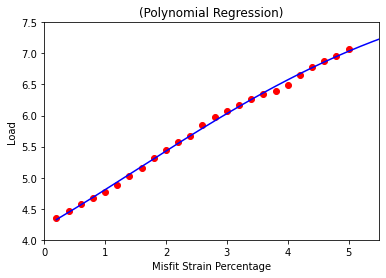

In [63]:
X_grid = np.arange(min(X), max(X), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, y, color = 'red')
plt.xlim(0, 5.5)
plt.ylim(4, 7.5)
plt.plot(X_grid, lin_reg_2.predict(poly_reg.fit_transform(X_grid)), color = 'blue')
plt.title('(Polynomial Regression)')
plt.xlabel('Misfit Strain Percentage')
plt.ylabel('Load')
plt.show()

## Predicting a new result with Polynomial Regression

In [59]:
Misfit_strain = 15
Load=lin_reg_2.predict(poly_reg.fit_transform([[Misfit_strain]]))
print('Misfit Strain Percentage = {}'.format(Misfit_strain))
print('Load Required to indent 100nM = {}'.format(Load[0]))

Misfit Strain Percentage = 15
Load Required to indent 100nM = 10.651890114220958
